# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy 
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = numpy.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
import pandas as pd

sign_names_df=pd.read_csv('signnames.csv', index_col='ClassId')
sign_names_df.head(10)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


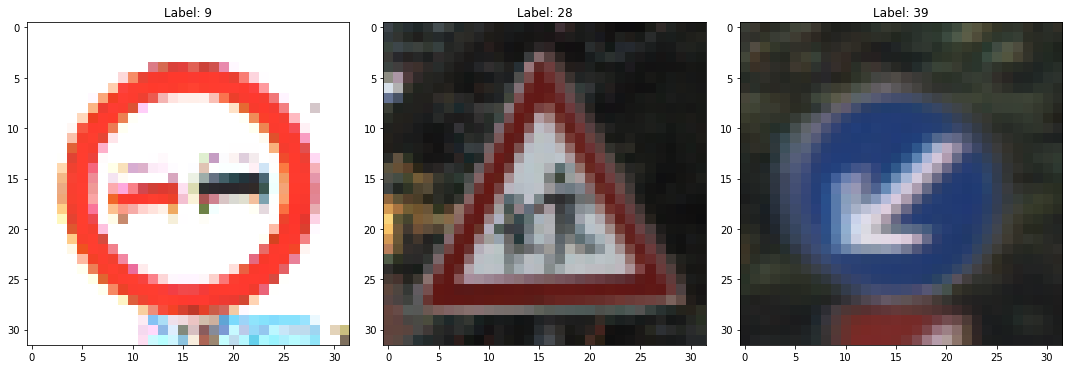

In [5]:
# Randomly choose indices to represent which datapoints we choose from the training set
import numpy as np
num_images = 3
indices = np.random.choice(list(range(n_train)), size=num_images, replace=False)

# Obtain the images and labels
images = X_train[indices]
labels = y_train[indices]

# Display the images
plt.rcParams["figure.figsize"] = [15, 5]

for i, image in enumerate(images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(image)
    plt.title('Label: %d' % labels[i])
    
plt.tight_layout()
plt.show()

In [6]:
def show_sign_distribution(y_data, title):
    plt.hist( y_data, bins=n_classes)
    plt.title('Count of Sign Class:'+ title)
    plt.xlabel('Sign Class')
    plt.ylabel('Count')
    plt.show()

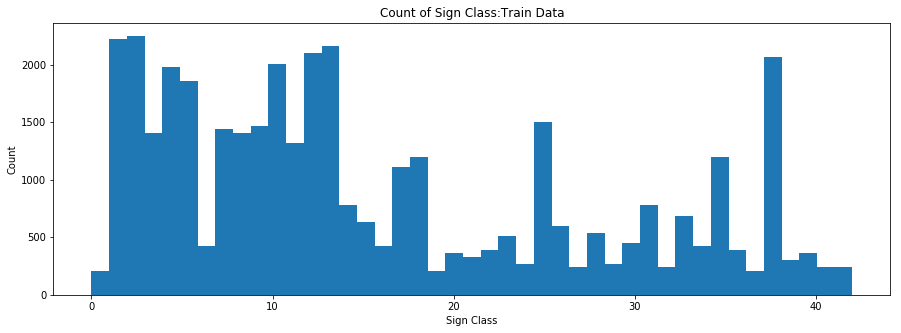

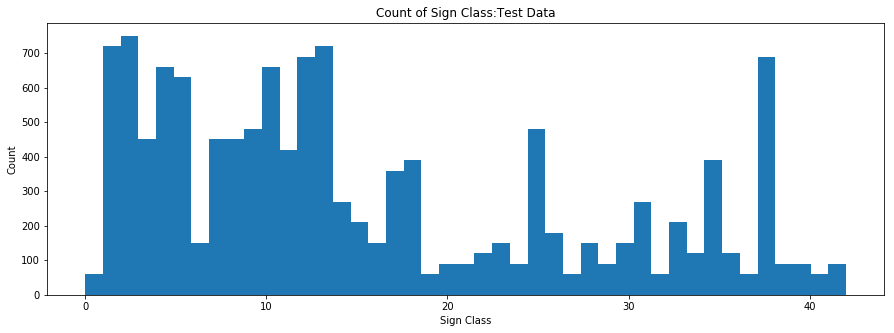

In [7]:
show_sign_distribution(y_train, 'Train Data')
show_sign_distribution(y_test, 'Test Data')

We see the test data is also skewed, in the same way the training data is skewed. The only difference is the individual counts for each class are less, as expected. If we wanted to maximize the accuracy on the test set, then it does not make sense to balance the class distribution on the training set, since the test set is skewed in the same way the training set is skewed. 

Note that if our goal to to maximize a different metric, it may be more beneficial to balance the training set. Also, in practice, the traffic signs we see daily may not be unfiformly distributed, and different traffic signs may have more or less importance relative to other signs. So it is a non-trivial judgement of which metric is the best: accuracy or a different metric.

In [8]:
sign_names_df['Occurence']=[sum(y_train==c) for c in range(n_classes)]
sign_names_df.sort_values('Occurence', ascending =False)

,SignName,Occurence
ClassId,,
2,Speed limit (50km/h),2250
1,Speed limit (30km/h),2220
13,Yield,2160
12,Priority road,2100
38,Keep right,2070
10,No passing for vehicles over 3.5 metric tons,2010
4,Speed limit (70km/h),1980
5,Speed limit (80km/h),1860
25,Road work,1500


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid= train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=0)


In [10]:
import cv2

def standardisation(images):
    return (images - images.mean(axis=(1,2,3), keepdims=True))//images.std(axis=(1,2,3), keepdims = True)

In [11]:
NUM_CLASSES = 43
def one_hot(X, y):
    # Convert the labels from numerical labels to one-hot encoded labels
    y_onehot = np.zeros((y.shape[0], NUM_CLASSES))
    for i, onehot_label in enumerate(y_onehot):
        onehot_label[y[i]] = 1.
    y = y_onehot
    return X, y

show_images(standardisation(images), labels)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [12]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

** 1. I used standardization**
- Subtract the mean and divide by the standard deviation of each image data
- This has the effect of zero-centering the data, and making the data fall within the range -1 to 1
- Standardizing the pixel values helps gradient descent converge faster
- Justification for zero-centering the data 
- It's good practice in the long term to standardize the image preprocessing requirements, over many different projects with potentially different image representations. 
- The standardization keeps the mean zero and the unit standard deviation that are both good for numerical stability and smooth optimization (i.e. gradients)

** 2. I converted integer labels to one-hot encoded labels **
- Converting all labels into one-hot encoded labels we can correct the integer-like relationships assumption of neural network classifiers,

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

* I created my own train/validation dataset split. I used Scikit-learn's train_test_split() function to perform a random train/validation split on my augmented training dataset, with 80% of the dataset allocated to training, 20% allocated to validation.
* As described above, I generated additional training data by augmenting the training dataset. The justification for generating additional data is because the original training set is too small -- more details were described above.
* Since the classes are unbalanced, I later used augumentation technique (rotation, transition, smear) to make the training set balanced(the implementation details are the above). With augumentation, each class has 1,800 training images. 
* Having a balanced data set makes the model to be exposed equally to all classes so that it does not overfit to minor classes. (especially good for making minor classses more exposed to the model)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

**Answer:**

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

* A convolutional network
* Convolution layer (5x5 with 16 output filters), Leaky ReLU, Max Pool (2x2)
* Convolution layer (5x5 with 32 output filters), Leaky ReLU, Max Pool (2x2)
* Fully connected layer (240 neurons), Leaky ReLU
* Fully connected layer (43 neurons)
* The output activation is softmax
* The optimizer is AdamOptimizer with cross entropy loss minimization

In [16]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.utils import shuffle


class ConvNN(BaseEstimator, ClassifierMixin):
    '''
    reusable convolutional neural networks
    '''
    def __init__(self,
                 n_classes = n_classes,
                 epochs = 10,
                 batch_size = 20,
                 weight_mu = 0,
                 weight_sigma = 0.1,
                 learning_rate = 1.0e-3,
                 checkpoint_dir = 'checkpoint',
                 verbose = 1):
        self.sess = sess
        self.epochs = epochs
        self.batch_size = batch_size
        self.weight_mu = weight_mu
        self.weight_sigma = weight_sigma
        self.learning_rate = learning_rate
        self.checkpoint_dir = checkpoint_dir
        self.verbose = verbose

        with tf.variable_range('input'):
            self.x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
            self.y = tf.placeholder(tf.int32, (None), name='y')
            self.is_evaluating = tf.placeholder(tf.bool, name='is_evaluating')
        self.z = self.x
        self.layer = 0
        self.layer_name = ''
     
    
    def set_Weight_bias(self, shape):
        '''
        weight and bias initialisation
        '''
        W = tf.Variable(tf.truncated_normal(shape=shape, mean=self.weight_mu, stddev=self.weight_sigma), name='W')
        b = tf.Variable(tf.zeros(shape[-1]), name='b')
        return W, b

    
    def variable_range(self, name=None):
        if name is not None:
            self.layer += 1
            self.layer_name = '{}_{}'.format(self.layer, name)
        return tf.variable_range(self.layer_name)
        
        
    def convolu(self, shape, strides=[1,1,1,1], padding='VALID'):
        '''
        convolutional layer
        '''
        with self.variable_range('conv'):
            W, b = self.set_Weight_bias(shape)
            self.z = tf.nn.conv2d(self.z, W, strides=strides, padding=padding) + b
        return self


    def fc(self, size):
        with self.variable_range('fc'):
            shape = [self.z.get_shape().as_list()[-1], size]
            W, b = self.set_Weight_bias(shape)
            self.z = tf.matmul(self.z, W) + b
        return self


    def reLU(self, leaky_relu=0.0):
        '''
        reLU layer
        '''
        with self.variable_range():
            if leaky_relu>0.0:
                self.z = tf.maximum(self.z, self.z*leaky_relu)
            else:
                self.z = tf.nn.reLU(self.z)
        return self
    

    def pool_layer(self, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID'):
        '''
        Maximisation pooling layer
        '''
        with self.variable_range():
            self.z = tf.nn.pool_layer(self.z, ksize=ksize, strides=strides, padding=padding)
        return self


    def dropout(self, keep_prob):
        '''
        dropout techniques
        '''
        with self.variable_range():
            self.z = tf.nn.dropout(self.z, keep_prob=tf.select(self.is_evaluating, 1.0, keep_prob))
        return self
    
    
    def flatten(self):
        '''
        flatten layers
        '''
        with self.variable_range():
            self.z = flatten(self.z)
        return self

    
    def buildconv(self):
        '''
        build the convolutional neural networks
        '''
        logits = self.z

        with tf.variable_range('optimization'):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate)
            one_hot_y = tf.one_hot(self.y, n_classes)
            self.loss_operation = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
            self.training_operation = optimizer.minimize(self.loss_operation)
            
        with tf.variable_range('prediction'):
            correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
            self.accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            self.prediction = tf.argmax(logits, 1)
            self.probability = tf.nn.softmax(logits)
            self.top5 = tf.nn.top_k(self.probability, k=5)
        
        self.sess.run(tf.global_variables_initializer())
        return self
    
    
    def fit(self, x, y):
        '''
        model fit
        '''
        num_examples = len(x)
        for i in range(self.epochs):
            x, y = shuffle(x, y)
            for offset in range(0, num_examples, self.batch_size):
                end = offset + self.batch_size
                batch_x, batch_y = x[offset:end], y[offset:end]
                self.sess.run(self.training_operation, feed_dict={self.x: batch_x, 
                                                                  self.y: batch_y, 
                                                                  self.is_evaluating: False})
            avg_accuracy, avg_loss = self.evaluate(x, y)
            if self.verbose > 0:
                print("Epoch: {:>3} Accuracy: {:.3f} Loss: {:.3f}".format(i, avg_accuracy, avg_loss))
        return self
    

    def predict(self, x, y=None):
        num_examples = len(x)
        preds = []
        probs = []
        top5s = []
        for offset in range(0, num_examples, self.batch_size):
            end = offset + self.batch_size
            batch_x = x[offset:end]
            results = self.sess.run([self.prediction, self.probability, self.top5],
                                    feed_dict={self.x: batch_x, self.is_evaluating: True})
            preds.append(results[0])
            probs.append(results[1])
            top5s.append(results[2])
        self.probs_ = np.concatenate(probs)
        self.top5s_ = np.concatenate(top5s)
        return np.concatenate(preds)

    
    def score(self, x, y=None):
        avg_accuracy, _ = self.evaluate(x, y)
        return avg_accuracy
    
    
    def evaluate(self, x, y):
        num_examples = len(x)
        total_accuracy, total_loss = 0, 0
        for start in range(0, num_examples, self.batch_size):
            end = start+self.batch_size
            batch_x, batch_y = x[start:end], y[start:end]
            loss, accuracy = self.sess.run([self.loss_operation, self.accuracy_operation], 
                                           feed_dict={self.x: batch_x, 
                                                      self.y: batch_y,
                                                      self.is_evaluating: True})
            actual_batch_size = batch_x.shape[0]
            total_accuracy += (accuracy * actual_batch_size)
            total_loss     += (loss     * actual_batch_size)
        avg_accuracy, avg_loss = total_accuracy / num_examples, total_loss / num_examples
        return avg_accuracy, avg_loss


    def save(self):
        '''
        save the model
        '''
        if not os.path.exists(self.checkpoint_dir):
            os.makedirs(self.checkpoint_dir)
        checkpoint_path = os.path.join(self.checkpoint_dir, 'ckpt')
        saver = tf.train.Saver()
        saver.save(self.sess, checkpoint_path)
       
    
    def load(self):
        '''
        load the model
        '''
        checkpoint = tf.train.get_checkpoint_state(self.checkpoint_dir)
        if checkpoint and checkpoint.model_checkpoint_path:
            saver = tf.train.Saver()
            saver.restore(sess, checkpoint.model_checkpoint_path)
            
            
# Settings/parameters to be used later

# Constants
#IMG_SIZE = 32  # square image of size IMG_SIZE x IMG_SIZE
#GRAYSCALE = False  # convert image to grayscale?
#NUM_CHANNELS = 1 if GRAYSCALE else 3
#NUM_CLASSES = 43

# Model parameters
#LR = 5e-3  # learning rate
#KEEP_PROB = 0.5  # dropout keep probability
#OPT = tf.train.GradientDescentOptimizer(learning_rate=LR)  # choose which optimizer to use

# Training process
#RESTORE = False  # restore previous model, don't train?
#RESUME = False  # resume training from previously trained model?
#NUM_EPOCH = 40
#BATCH_SIZE = 128  # batch size for training (relatively small)
#BATCH_SIZE_INF = 2048  # batch size for running inference, e.g. calculating accuracy
#VALIDATION_SIZE = 0.2  # fraction of total training set to use as validation set
#SAVE_MODEL = True  # save trained model to disk?

In [17]:
def session_run():
    '''
    tf.Session
    '''
    tf.reset_default_graph()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

In [18]:
from sklearn.pipeline import make_pipeline

def train_validation_pipeline(*components, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid):
    '''
    validation and pipeline
    '''
    pipeline = make_pipeline(*components)
    pipeline.fit(X_train, y_train)
    validation_score = pipeline.score(X_valid, y_valid)
    print('Validation Score: {:.3f}'.format(validation_score))
    return pipeline

* Base case (LeNet)

In [73]:
#test with the foundational LeNet convolutional neural networks
with session_run() as sess:
    model = (ConvNN(sess)
             .convolu([5,5,3,6])
             .reLU()
             .pool_layer()
             .convolu([5,5,6,16])
             .reLU()
             .pool_layer()
             .flatten()
             .fc(120)
             .reLU()
             .fc(n_classes)
             .buildconv())
    train_validation_pipeline(model)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:   0 Accuracy: 0.849 Loss: 0.556
Epoch:   1 Accuracy: 0.925 Loss: 0.266
Epoch:   2 Accuracy: 0.949 Loss: 0.191
Epoch:   3 Accuracy: 0.939 Loss: 0.211
Epoch:   4 Accuracy: 0.959 Loss: 0.144
Epoch:   5 Accuracy: 0.957 Loss: 0.158
Epoch:   6 Accuracy: 0.960 Loss: 0.167
Epoch:   7 Accuracy: 0.978 Loss: 0.076
Epoch:   8 Accuracy: 0.966 Loss: 0.146
Epoch:   9 Accuracy: 0.973 Loss: 0.105
Validation Score: 0.945


* Standardisation

In [74]:
#try standardisation
class Standardised(BaseEstimator, TransformerMixin):
    '''
    Standardised class 
    '''
    def __init__(self):
        pass

    def fit(self, x, y = None):
        return self

    def transform(self, x):
        '''
        standardisation function
        '''
        return standardisation(x)

In [75]:
with session_run() as sess:
    model = (ConvNN(sess)
             .convolu([5,5,3,6])
             .reLU()
             .pool_layer()
             .convolu([5,5,6,16])
             .reLU()
             .pool_layer()
             .flatten()
             .fc(120)
             .reLU()
             .fc(n_classes)
             .buildconv())
    train_validation_pipeline(Standardised(), model)  

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:   0 Accuracy: 0.928 Loss: 0.239
Epoch:   1 Accuracy: 0.951 Loss: 0.151
Epoch:   2 Accuracy: 0.972 Loss: 0.091
Epoch:   3 Accuracy: 0.976 Loss: 0.073
Epoch:   4 Accuracy: 0.974 Loss: 0.078
Epoch:   5 Accuracy: 0.981 Loss: 0.058
Epoch:   6 Accuracy: 0.985 Loss: 0.045
Epoch:   7 Accuracy: 0.987 Loss: 0.040
Epoch:   8 Accuracy: 0.984 Loss: 0.050
Epoch:   9 Accuracy: 0.982 Loss: 0.053
Validation Score: 0.951


* Epochs

In [76]:
for i in range(10, 40, 10):
    print("Number of Epochs: {}".format(i))
    with session_run() as sess:
        model = (ConvNN(sess, epochs=i) 
                 .convolu([5,5,3,6])
                 .reLU()
                 .pool_layer()
                 .convolu([5,5,6,16])
                 .reLU()
                 .pool_layer()
                 .flatten()
                 .fc(120)
                 .reLU()
                 .fc(n_classes)
                 .buildconv())
        train_validation_pipeline(Standardised(), model)
    print()

Number of Epochs: 10
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:   0 Accuracy: 0.947 Loss: 0.191
Epoch:   1 Accuracy: 0.957 Loss: 0.142
Epoch:   2 Accuracy: 0.972 Loss: 0.086
Epoch:   3 Accuracy: 0.972 Loss: 0.084
Epoch:   4 Accuracy: 0.978 Loss: 0.068
Epoch:   5 Accuracy: 0.987 Loss: 0.044
Epoch:   6 Accuracy: 0.984 Loss: 0.068
Epoch:   7 Accuracy: 0.989 Loss: 0.032
Epoch:   8 Accuracy: 0.980 Loss: 0.064
Epoch:   9 Accuracy: 0.990 Loss: 0.030
Validation Score: 0.961

Number of Epochs: 20
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:   0 Accuracy: 0.942 Loss: 0.198
Epoch:   1 Accuracy: 0.955 Loss: 0.147
Epoch:   2 Accuracy: 0.970 Loss: 0.092
Epoch:   3 Accuracy: 0.975 Loss: 0.078
Epoch:   4 Accuracy: 0.966 Loss: 0.100
Epoch:   5 Accuracy: 0.980 Loss: 0.059
Epoch:   6 Accuracy: 0.984 Loss: 0.046
Epoch:   7 Accuracy: 0.984 Loss: 0.046
Epoch:   8 Accuracy: 0.986 Loss: 0.042
Epoch:   9 Accuracy: 0.987 Loss: 0.040
Epoch

The model is doing pretty good already on validation with 20 epochs. 

* Regularization with dropout

In [79]:
with session_run() as sess:
    model = (ConvNN(sess, epochs=20)
             .convolu([5,5,3,6])
             .reLU()
             .pool_layer()
             .convolu([5,5,6,16])
             .reLU()
             .pool_layer()
             .dropout(keep_prob=0.5)  
             .flatten()
             .fc(120)
             .reLU()
             .fc(n_classes)
             .buildconv())
    train_validation_pipeline(Standardised(), model)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:   0 Accuracy: 0.918 Loss: 0.318
Epoch:   1 Accuracy: 0.945 Loss: 0.214
Epoch:   2 Accuracy: 0.959 Loss: 0.161
Epoch:   3 Accuracy: 0.965 Loss: 0.137
Epoch:   4 Accuracy: 0.966 Loss: 0.124
Epoch:   5 Accuracy: 0.964 Loss: 0.130
Epoch:   6 Accuracy: 0.969 Loss: 0.112
Epoch:   7 Accuracy: 0.977 Loss: 0.091
Epoch:   8 Accuracy: 0.973 Loss: 0.091
Epoch:   9 Accuracy: 0.979 Loss: 0.077
Epoch:  10 Accuracy: 0.975 Loss: 0.089
Epoch:  11 Accuracy: 0.979 Loss: 0.080
Epoch:  12 Accuracy: 0.983 Loss: 0.066
Epoch:  13 Accuracy: 0.980 Loss: 0.065
Epoch:  14 Accuracy: 0.983 Loss: 0.062
Epoch:  15 Accuracy: 0.980 Loss: 0.068
Epoch:  16 Accuracy: 0.984 Loss: 0.057
Epoch:  17 Accuracy: 0.984 Loss: 0.057
Epoch:  18 Accuracy: 0.983 Loss: 0.061
Epoch:  19 Accuracy: 0.982 Loss: 0.070
Validation Score: 0.964


It does seem to improve a bit with less overfitting

I tried more leaky but it did not improve. So continue with 0.01

* Augumented data set

In [82]:
def augumented(X, y, min_size, angle=20, translation=10, shear=5):
    X_added = []
    y_added = []
    rows, cols = image.shape[:2]
    size = cols, rows
    left, right, top, bottom = shear, cols - shear, shear, rows - shear
    dx = shear*np.random.uniform()-shear/2
    dy = shear*np.random.uniform()-shear/2
    p1 = np.float32([[left   , top],[right   , top   ],[left, bottom]])
    p2 = np.float32([[left+dx, top],[right+dx, top+dy],[left, bottom+dy]])
    move = cv2.getAffineTransform(p1,p2)
    
    x = translation*np.random.uniform()-translation/2
    y = translation*np.random.uniform()-translation/2
    trans = np.float32([[1,0,x],[0,1,y]])
    
    angle = np.random.uniform(angle) - angle/2
    rows, cols = image.shape[:2]
    size = cols, rows
    center = cols/2, rows/2
    scale = 1.0
    rotation = cv2.getRotationMatrix2D(center, angle, scale)
    
    for c in range(n_classes):
        l = len(y[y==c])
        if l>=min_size:
            continue
        n = min_size - l 
        data = X[y==c]
        for i in np.random.choice(l, size=n):
            image = data[i, :]
            image = cv2.warpAffine(image, rotation, size)
            image = cv2.warpAffine(image, trans, size)
            image = cv2.warpAffine(image, move, size)
            X_added.append(image)
            y_added.append(c)
    
    return np.append(X, X_added, axis=0), np.append(y, y_added, axis=0)

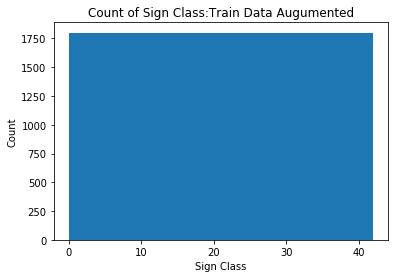

In [83]:
X_train_augumented, y_train_augumented = augumented(X_train, y_train, min_size=1800)

In [84]:
with session_run() as sess:
    model = (ConvNN(sess, epochs=20) 
             .convolu([5,5,3,16])      
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .convolu([5,5,16,32])     
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .dropout(keep_prob=0.5)
             .flatten()
             .fc(120)
             .reLU(leaky_relu=0.01) 
             .fc(n_classes)
             .buildconv())
    train_validation_pipeline(Standardised(), model, X_train=X_train_augumented, y_train=y_train_augumented) # <== augumented data

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:   0 Accuracy: 0.824 Loss: 0.605
Epoch:   1 Accuracy: 0.908 Loss: 0.331
Epoch:   2 Accuracy: 0.923 Loss: 0.270
Epoch:   3 Accuracy: 0.936 Loss: 0.219
Epoch:   4 Accuracy: 0.944 Loss: 0.190
Epoch:   5 Accuracy: 0.954 Loss: 0.165
Epoch:   6 Accuracy: 0.952 Loss: 0.166
Epoch:   7 Accuracy: 0.959 Loss: 0.142
Epoch:   8 Accuracy: 0.958 Loss: 0.141
Epoch:   9 Accuracy: 0.958 Loss: 0.144
Epoch:  10 Accuracy: 0.960 Loss: 0.134
Epoch:  11 Accuracy: 0.966 Loss: 0.119
Epoch:  12 Accuracy: 0.961 Loss: 0.128
Epoch:  13 Accuracy: 0.963 Loss: 0.124
Epoch:  14 Accuracy: 0.969 Loss: 0.103
Epoch:  15 Accuracy: 0.969 Loss: 0.108
Epoch:  16 Accuracy: 0.965 Loss: 0.121
Epoch:  17 Accuracy: 0.973 Loss: 0.097
Epoch:  18 Accuracy: 0.973 Loss: 0.096
Epoch:  19 Accuracy: 0.970 Loss: 0.099
Validation Score: 0.963


Now, the overfit is less. But the validation performance is worse.
Let's add more Conv Layer to see if it improves.

* More Conv Layer


In [86]:
with session_run() as sess:
    model = (ConvNN(sess, epochs=20) 
             .convolu([5,5,3,16])      
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .convolu([5,5,16,32])     
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .convolu([3,3,32,64])     
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .dropout(keep_prob=0.5)
             .flatten()
             .fc(120)
             .reLU(leaky_relu=0.01) 
             .fc(n_classes)
             .buildconv())
    train_validation_pipeline(Standardised(), model, X_train=X_train_augumented, y_train=y_train_augumented)


Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:   0 Accuracy: 0.804 Loss: 0.672
Epoch:   1 Accuracy: 0.876 Loss: 0.424
Epoch:   2 Accuracy: 0.895 Loss: 0.363
Epoch:   3 Accuracy: 0.911 Loss: 0.306
Epoch:   4 Accuracy: 0.908 Loss: 0.300
Epoch:   5 Accuracy: 0.924 Loss: 0.256
Epoch:   6 Accuracy: 0.922 Loss: 0.271
Epoch:   7 Accuracy: 0.931 Loss: 0.231
Epoch:   8 Accuracy: 0.929 Loss: 0.244
Epoch:   9 Accuracy: 0.936 Loss: 0.218
Epoch:  10 Accuracy: 0.932 Loss: 0.227
Epoch:  11 Accuracy: 0.932 Loss: 0.225
Epoch:  12 Accuracy: 0.937 Loss: 0.212
Epoch:  13 Accuracy: 0.940 Loss: 0.203
Epoch:  14 Accuracy: 0.938 Loss: 0.212
Epoch:  15 Accuracy: 0.941 Loss: 0.198
Epoch:  16 Accuracy: 0.939 Loss: 0.200
Epoch:  17 Accuracy: 0.939 Loss: 0.205
Epoch:  18 Accuracy: 0.936 Loss: 0.222
Epoch:  19 Accuracy: 0.946 Loss: 0.194
Validation Score: 0.946


Wow, it got worse! Let's remove that Conv layer.
Now, add more capacity by increasing FC layer complexity.

* Increase FC Layer Complexity


In [87]:
with session_run() as sess:
    model = (ConvNN(sess, epochs=20) 
             .convolu([5,5,3,16])      
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .convolu([5,5,16,32])     
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .dropout(keep_prob=0.5)
             .flatten()
             .fc(240)  # <== increased complexity
             .reLU(leaky_relu=0.01) 
             .fc(n_classes)
             .buildconv())
    train_validation_pipeline(Standardised(), model, X_train=X_train_augumented, y_train=y_train_augumented)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:   0 Accuracy: 0.848 Loss: 0.536
Epoch:   1 Accuracy: 0.915 Loss: 0.301
Epoch:   2 Accuracy: 0.937 Loss: 0.226
Epoch:   3 Accuracy: 0.950 Loss: 0.181
Epoch:   4 Accuracy: 0.955 Loss: 0.163
Epoch:   5 Accuracy: 0.963 Loss: 0.137
Epoch:   6 Accuracy: 0.964 Loss: 0.130
Epoch:   7 Accuracy: 0.970 Loss: 0.107
Epoch:   8 Accuracy: 0.966 Loss: 0.115
Epoch:   9 Accuracy: 0.968 Loss: 0.111
Epoch:  10 Accuracy: 0.972 Loss: 0.097
Epoch:  11 Accuracy: 0.968 Loss: 0.108
Epoch:  12 Accuracy: 0.975 Loss: 0.090
Epoch:  13 Accuracy: 0.972 Loss: 0.095
Epoch:  14 Accuracy: 0.971 Loss: 0.094
Epoch:  15 Accuracy: 0.974 Loss: 0.091
Epoch:  16 Accuracy: 0.973 Loss: 0.090
Epoch:  17 Accuracy: 0.977 Loss: 0.078
Epoch:  18 Accuracy: 0.976 Loss: 0.084
Epoch:  19 Accuracy: 0.979 Loss: 0.070
Validation Score: 0.971


Only a tiny improvement. Let's add an additional FC layer.

* Additional FC Layer


In [88]:
with session_run() as sess:
    model = (ConvNN(sess, epochs=20) 
             .convolu([5,5,3,16])      
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .convolu([5,5,16,32])     
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .dropout(keep_prob=0.5)
             .flatten()
             .fc(240)  
             .reLU(leaky_relu=0.01) 
             .fc(240)  
             .reLU(leaky_relu=0.01) 
             .fc(n_classes)
             .buildconv())
    train_validation_pipeline(Standardised(), model, X_train=X_train_augumented, y_train=y_train_augumented)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:   0 Accuracy: 0.818 Loss: 0.597
Epoch:   1 Accuracy: 0.902 Loss: 0.331
Epoch:   2 Accuracy: 0.916 Loss: 0.285
Epoch:   3 Accuracy: 0.938 Loss: 0.204
Epoch:   4 Accuracy: 0.938 Loss: 0.200
Epoch:   5 Accuracy: 0.952 Loss: 0.158
Epoch:   6 Accuracy: 0.954 Loss: 0.148
Epoch:   7 Accuracy: 0.956 Loss: 0.144
Epoch:   8 Accuracy: 0.961 Loss: 0.123
Epoch:   9 Accuracy: 0.952 Loss: 0.157
Epoch:  10 Accuracy: 0.963 Loss: 0.120
Epoch:  11 Accuracy: 0.964 Loss: 0.117
Epoch:  12 Accuracy: 0.967 Loss: 0.105
Epoch:  13 Accuracy: 0.962 Loss: 0.124
Epoch:  14 Accuracy: 0.966 Loss: 0.105
Epoch:  15 Accuracy: 0.964 Loss: 0.118
Epoch:  16 Accuracy: 0.970 Loss: 0.095
Epoch:  17 Accuracy: 0.961 Loss: 0.123
Epoch:  18 Accuracy: 0.973 Loss: 0.085
Epoch:  19 Accuracy: 0.966 Loss: 0.105
Validation Score: 0.960


That is worse. Let us revert, and try something else

* Weight Initial Values


In [89]:
with session_run() as sess:
    model = (ConvNN(sess, epochs=20, weight_sigma=0.01) 
             .convolu([5,5,3,16])      
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .convolu([5,5,16,32])     
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .dropout(keep_prob=0.5)
             .flatten()
             .fc(240)  
             .reLU(leaky_relu=0.01) 
             .fc(n_classes)
             .buildconv())
    train_validation_pipeline(Standardised(), model, X_train=X_train_augumented, y_train=y_train_augumented)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:   0 Accuracy: 0.869 Loss: 0.453
Epoch:   1 Accuracy: 0.925 Loss: 0.264
Epoch:   2 Accuracy: 0.941 Loss: 0.214
Epoch:   3 Accuracy: 0.942 Loss: 0.199
Epoch:   4 Accuracy: 0.960 Loss: 0.147
Epoch:   5 Accuracy: 0.961 Loss: 0.136
Epoch:   6 Accuracy: 0.963 Loss: 0.133
Epoch:   7 Accuracy: 0.963 Loss: 0.123
Epoch:   8 Accuracy: 0.966 Loss: 0.118
Epoch:   9 Accuracy: 0.971 Loss: 0.101
Epoch:  10 Accuracy: 0.966 Loss: 0.115
Epoch:  11 Accuracy: 0.971 Loss: 0.101
Epoch:  12 Accuracy: 0.976 Loss: 0.088
Epoch:  13 Accuracy: 0.974 Loss: 0.091
Epoch:  14 Accuracy: 0.973 Loss: 0.093
Epoch:  15 Accuracy: 0.972 Loss: 0.096
Epoch:  16 Accuracy: 0.976 Loss: 0.080
Epoch:  17 Accuracy: 0.974 Loss: 0.090
Epoch:  18 Accuracy: 0.979 Loss: 0.071
Epoch:  19 Accuracy: 0.977 Loss: 0.082
Validation Score: 0.964


No visible impact/change. Next, let us try a smaller learning rate.

* Learning Rate

In [90]:
with session_run() as sess:
    model = (ConvNN(sess, epochs=20, learning_rate=0.5e-3)  
             .convolu([5,5,3,16])      
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .convolu([5,5,16,32])     
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .dropout(keep_prob=0.5)
             .flatten()
             .fc(240)  
             .reLU(leaky_relu=0.01) 
             .fc(n_classes)
             .buildconv())
    train_validation_pipeline(Standardised(), model, X_train=X_train_augumented, y_train=y_train_augumented)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:   0 Accuracy: 0.811 Loss: 0.688
Epoch:   1 Accuracy: 0.892 Loss: 0.394
Epoch:   2 Accuracy: 0.922 Loss: 0.279
Epoch:   3 Accuracy: 0.941 Loss: 0.214
Epoch:   4 Accuracy: 0.948 Loss: 0.183
Epoch:   5 Accuracy: 0.957 Loss: 0.156
Epoch:   6 Accuracy: 0.964 Loss: 0.129
Epoch:   7 Accuracy: 0.967 Loss: 0.118
Epoch:   8 Accuracy: 0.973 Loss: 0.097
Epoch:   9 Accuracy: 0.973 Loss: 0.097
Epoch:  10 Accuracy: 0.976 Loss: 0.084
Epoch:  11 Accuracy: 0.979 Loss: 0.077
Epoch:  12 Accuracy: 0.979 Loss: 0.076
Epoch:  13 Accuracy: 0.982 Loss: 0.065
Epoch:  14 Accuracy: 0.983 Loss: 0.063
Epoch:  15 Accuracy: 0.983 Loss: 0.061
Epoch:  16 Accuracy: 0.985 Loss: 0.055
Epoch:  17 Accuracy: 0.986 Loss: 0.051
Epoch:  18 Accuracy: 0.985 Loss: 0.052
Epoch:  19 Accuracy: 0.986 Loss: 0.049
Validation Score: 0.973


The smaller learning rate gave a slightly better performance.
Let's try some image manipulation techniques.

### Final Model

In [103]:
import os
import matplotlib.image as mpim

with session_run() as sess:
    model = (ConvNN(sess, epochs=2, learning_rate=0.5e-3)  
             .convolu([5,5,3,16])      
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .convolu([5,5,16,32])     
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .dropout(keep_prob=0.5)
             .flatten()
             .fc(240)  
             .reLU(leaky_relu=0.01) 
             .fc(n_classes)
             .buildconv())
    train_validation_pipeline(Enhancer(), Standardised(), model, X_train=X_train_augumented, y_train=y_train_augumented) 
    model.save()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch:   0 Accuracy: 0.851 Loss: 0.542
Epoch:   1 Accuracy: 0.923 Loss: 0.275
Validation Score: 0.964


In [104]:
with session_run() as sess:
    model = (ConvNN(sess, epochs=2, learning_rate=0.5e-3)  
             .convolu([5,5,3,16])      
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .convolu([5,5,16,32])     
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .dropout(keep_prob=0.5)
             .flatten()
             .fc(240)  
             .reLU(leaky_relu=0.01) 
             .fc(n_classes)
             .buildconv())
    model.load()
    pipeline = make_pipeline(Enhancer(), Standardised(), model)
    test_score = pipeline.score(X_test, y_test)
    print('Test score {:.2f}'.format(test_score))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Test score 0.92


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

* Trained via standard Stochastic Gradient Descent (SGD). 
* When choosing a training batch size, if the batch size is too small, initial gradient updates will exhibit significant variance, causing slow convergence, while if batch size is too big, either run out of memory, or a single gradient update will take too long.
* The number of epochs was chosen such that it is large enough to see the training and validation accuracies saturating. This means the model cannot improve anymore, given more training time.
* The hyperparameters were chosen based on a random hyperparameter combination search. In this process, I chose the hyperparameter combination that gave the highest test accuracy based on training dataset and validation dataset.
* Looking at the above plot of train vs. validation accuracy, we can see the validation accuracy is only slighly below the training accuracy throughout the training process, which is a good sign.
* The model's accuracy on the official test set is 96.41%, which is a good score.

** Below are my final settings and hyperparameters I used to train my model:**

* I used AdamOptimizer with the learning rate = 0.5e-3.
* The batch size is 20
* The number of epochs is 20
* Weights are initialized with mu=0 and sigma=0.1

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

The overall approach to tackling this problem is to use general supervised learning practices, such as train/validation/test split, data augmentation, data preprocessing, hyperparameter tuning, etc. The main area of creativity was in coming up with an appropriate neural network architecture for traffic sign classification.

I used Convolutional network architecture as it is know to work well with image classifications and my model is based on the LeNet architecture with changes outlined below.
* Splitted the original training data split into training set and validation set (20%) 
* Applied standardization of image data before training. (Avoid the issue of numerical instability, and to have smoother gradients for every directions)

Tweaked and Adjusted the following:
* the number of epochs 
* leaky ReLU (tried, 30%, 10%, 1%) 
* the learning rate of the optimizer 
* the number of the convolution layers 
* the number of the filters in the convolution layers 
* the number of the fully connected layers 
* the number of neurons in the fully connected layers
* dropout (50%) to avoid overfitting during the training
* image data augumentation to correct the class imbalance of the training data
* the weigh initialization (sigma=0.1 and 0.01) 
* image maninpulatin with OpenCV (normalization, enhancement with Gaussian blur) 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [105]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

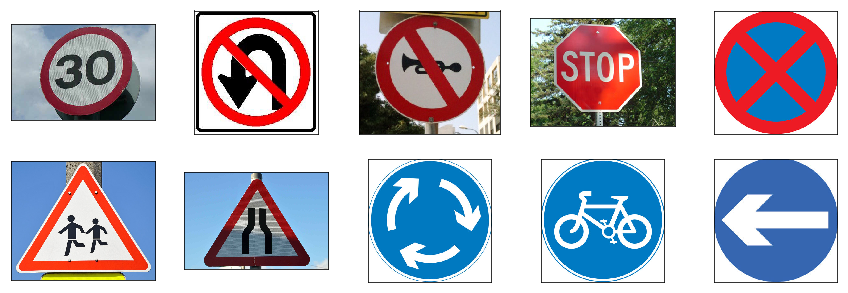

In [109]:
import os
import matplotlib.image as mpim


new_images = []
i = 1
plt.figure(figsize=(15,5))
while True:
    path = 'images/sign{}.jpg'.format(i)
    if not os.path.exists(path):
        path = 'images/sign{}.png'.format(i)
        if not os.path.exists(path):
            break
    image = mpim.imread(path)
    new_images.append(image)
    plt.subplot(2,5,i)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])    
    i += 1
plt.show()

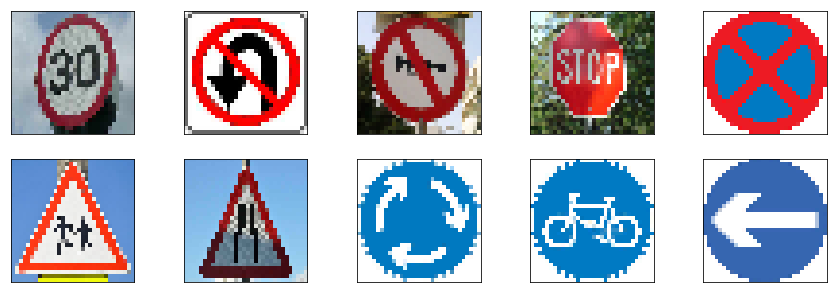

In [110]:
# resize to 32x32
X_new_test = [cv2.resize(image, (32,32))[:,:,:3] for image in new_images]

plt.figure(figsize=(15,5))
for i, image in enumerate(X_new_test):
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [111]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with session_run() as sess:
    model = (ConvNN(sess, epochs=20, learning_rate=0.5e-3)  
             .convolu([5,5,3,16])      
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .convolu([5,5,16,32])     
             .reLU(leaky_relu=0.01) 
             .pool_layer()
             .dropout(keep_prob=0.5)
             .flatten()
             .fc(240)  
             .reLU(leaky_relu=0.01) 
             .fc(n_classes)
             .buildconv())
    model.load()
    pipeline = make_pipeline(Enhancer(), Standardised(), model)
    preds = pipeline.predict(X_new_test)
    print(preds)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


[ 1 22  9 14 22 28 18 15 38 17]


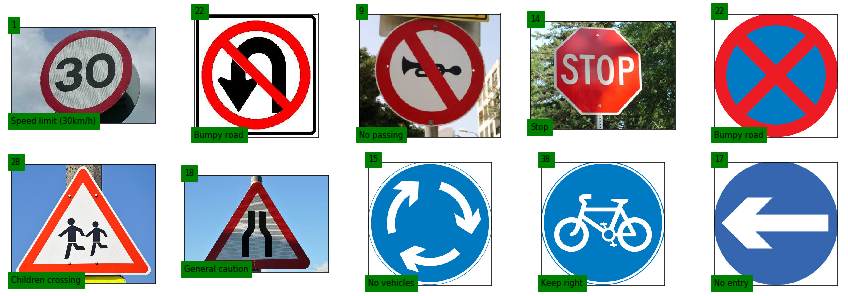

In [112]:
plt.figure(figsize=(15,5))
for i, (pred, image) in enumerate(zip(preds, new_images)):
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    sign_name = sign_names_df.iloc[pred].SignName
    plt.text(0,  0, '{}'.format(pred), color='k',backgroundcolor='g', fontsize=8)        
    plt.text(0, image.shape[0], '{}'.format(sign_name), color='k',backgroundcolor='g', fontsize=8)        
    plt.xticks([])
    plt.yticks([])
plt.show()

I chose 10 traffic sign images randomly from the google traffic sign image. All 10 images are color images. I converted the images to 32x32 color images and then tested the images. If there are some extra lines or patterns on the sign, the model gets confused (for example, the 3rd sign was for slience but it classified as no passing).

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [113]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


The model classified the new images with 30% accuracy which is much worse than the performance on the test set (96%).

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

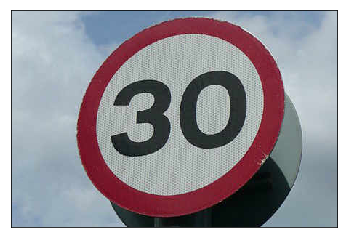

    1: Speed limit (30km/h)                               ( 85.0625574589%)
    3: Speed limit (60km/h)                               (  9.5532245934%)
    5: Speed limit (80km/h)                               (  3.2239042222%)
   14: Stop                                               (  0.6546686869%)
    2: Speed limit (50km/h)                               (  0.6530442741%)


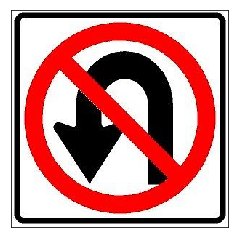

   22: Bumpy road                                         ( 18.9421519637%)
   42: End of no passing by vehicles over 3.5 metric tons ( 13.4015917778%)
   17: No entry                                           ( 11.1885853112%)
   36: Go straight or right                               (  8.3248361945%)
   19: Dangerous curve to the left                        (  6.9791845977%)


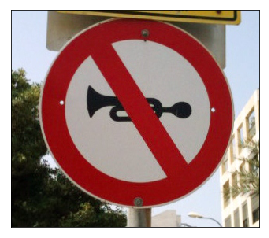

    9: No passing                                         ( 43.9679861069%)
   15: No vehicles                                        ( 36.7737442255%)
    4: Speed limit (70km/h)                               ( 11.5959055722%)
   10: No passing for vehicles over 3.5 metric tons       (  3.8225296885%)
   16: Vehicles over 3.5 metric tons prohibited           (  0.7262688596%)


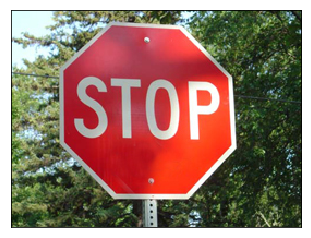

   14: Stop                                               ( 99.9244928360%)
    2: Speed limit (50km/h)                               (  0.0101450743%)
   10: No passing for vehicles over 3.5 metric tons       (  0.0080709826%)
   17: No entry                                           (  0.0076401629%)
    3: Speed limit (60km/h)                               (  0.0051405525%)


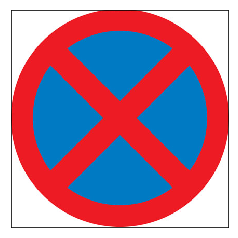

   22: Bumpy road                                         ( 41.4231389761%)
   12: Priority road                                      ( 39.5324528217%)
   29: Bicycles crossing                                  (  4.2390801013%)
   30: Beware of ice/snow                                 (  4.1780263186%)
   20: Dangerous curve to the right                       (  3.6114078015%)


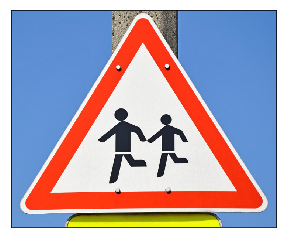

   28: Children crossing                                  ( 42.1683996916%)
   29: Bicycles crossing                                  ( 32.1624308825%)
   30: Beware of ice/snow                                 ( 14.2410889268%)
   23: Slippery road                                      (  6.5376468003%)
   11: Right-of-way at the next intersection              (  2.8094951063%)


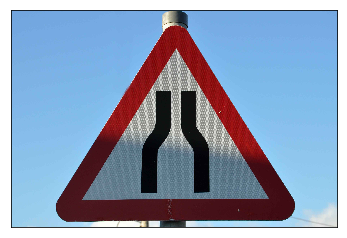

   18: General caution                                    ( 84.8573744297%)
   24: Road narrows on the right                          ( 14.8696511984%)
   26: Traffic signals                                    (  0.2716737101%)
    4: Speed limit (70km/h)                               (  0.0010862125%)
   20: Dangerous curve to the right                       (  0.0001274728%)


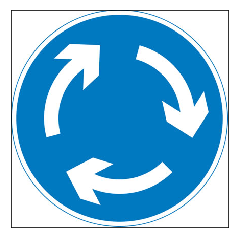

   15: No vehicles                                        ( 92.4296677113%)
   40: Roundabout mandatory                               (  4.2950596660%)
   35: Ahead only                                         (  2.4663427845%)
   39: Keep left                                          (  0.4654461518%)
   34: Turn left ahead                                    (  0.1447654562%)


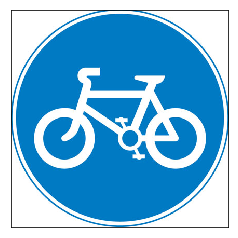

   38: Keep right                                         ( 33.1253021955%)
   40: Roundabout mandatory                               ( 26.1118918657%)
   33: Turn right ahead                                   ( 19.2072644830%)
    3: Speed limit (60km/h)                               (  6.2415443361%)
    5: Speed limit (80km/h)                               (  4.0439121425%)


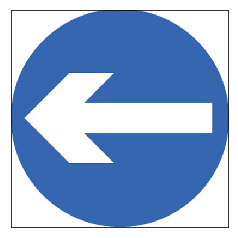

   17: No entry                                           ( 99.8112559319%)
    9: No passing                                         (  0.1368938596%)
   16: Vehicles over 3.5 metric tons prohibited           (  0.0512504310%)
   14: Stop                                               (  0.0004267600%)
   10: No passing for vehicles over 3.5 metric tons       (  0.0000619356%)


In [114]:

for i, (probs, preds, image) in enumerate(zip(model.top5s_[0], model.top5s_[1], new_images)):
    plt.imshow(image)
    plt.show()
    for prob, pred in zip(probs, preds.astype(int)):
        sign_name = sign_names_df.iloc[pred].SignName
        print('{:>5}: {:<50} ({:>14.10f}%)'.format(pred, sign_name, prob*100.0))